
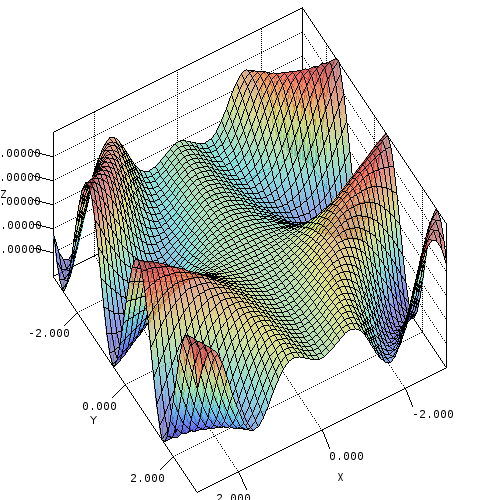

In [2]:
%use s2
import org.jzy3d.chart.Chart
import org.jzy3d.chart.factories.EmulGLChartFactory
import org.jzy3d.colors.*
import org.jzy3d.colors.colormaps.ColorMapRainbow
import org.jzy3d.maths.Range
import org.jzy3d.plot3d.builder.*
import org.jzy3d.plot3d.builder.concrete.OrthonormalGrid
import org.jzy3d.plot3d.primitives.*
import org.jzy3d.plot3d.rendering.canvas.*
import kotlin.math.sin

fun chart(drawable: Drawable): Chart {
    val factory = EmulGLChartFactory()
    val q = Quality.Nicest()
    val chart = factory.newChart(q)
    chart.scene.graph.add(drawable)
    val c = chart.canvas as EmulGLCanvas
    c.isProfileDisplayMethod = true
    c.gl.isAutoAdaptToHiDPI = true
    return chart
}

fun surface(): Shape {
    // Define a function to plot
    val mapper: Mapper = object : Mapper() {
        override fun f(x: Double, y: Double): Double = x * sin(x * y)
    }
    
    // Define range and precision for the function to plot
    val range = Range(-3f, 3f)
    val steps = 50
    
    // Create a surface drawing that function
    val surface = SurfaceBuilder().orthonormal(OrthonormalGrid(range, steps), mapper)
    val colorMapper = ColorMapper(ColorMapRainbow(), surface, Color(1f, 1f, 1f, 0.65f))
    surface.colorMapper = colorMapper
    surface.faceDisplayed = true
    surface.wireframeDisplayed = true
    surface.wireframeColor = Color.BLACK
    surface.wireframeWidth = 1f
    return surface
}

Jzy3dUtils.display(chart(surface()))